# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2

import os
import glob

In [2]:
TRAINING_DIR = 'data/train'
TESTING_DIR = 'data/test'

### Number of classes

In [3]:
# classes = [x[0] for x in os.walk(TRAINING_DIR)] 
# classes
classes = glob.glob(TRAINING_DIR + '/*')
print('Number of classes: ', len(classes))
print(classes)

Number of classes:  3
['data/train/Type_3', 'data/train/Type_1', 'data/train/Type_2']


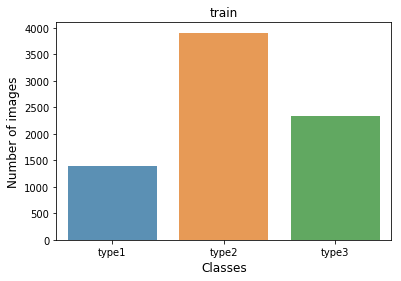

In [4]:
# Number of images per class

type1 = glob.glob("{}/Type_1/*.jpg".format(TRAINING_DIR))
type2 = glob.glob("{}/Type_2/*.jpg".format(TRAINING_DIR))
type3 = glob.glob("{}/Type_3/*.jpg".format(TRAINING_DIR))
test = glob.glob("{}/*.jpg".format(TESTING_DIR))

all_types = [type1, type2, type3]

counts = {
    'type1': len(type1),
    'type2': len(type2),
    'type3': len(type3)
}


sns.barplot(list(counts.keys()), list(counts.values()), alpha=0.8)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of images', fontsize=12)
plt.title("train")

plt.show()

### Sizes of images in pixels

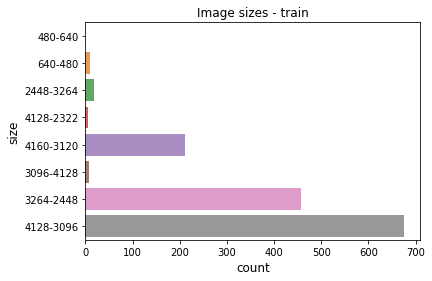

In [5]:
counts = {}
for i, file_path in enumerate(all_types[0]):
    image = cv2.imread(file_path)
    size_to_str = str(image.shape[0]) + '-' + str(image.shape[1])
    if not size_to_str in counts:
        counts[size_to_str] = 0
    else: 
        counts[size_to_str] += 1
        
sns.barplot(list(counts.values()), list(counts.keys()), alpha=0.8)
plt.ylabel('size', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.title("Image sizes - train")
plt.show()

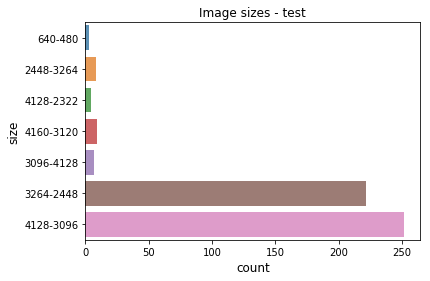

In [6]:
counts = {}
for i, file_path in enumerate(test):
    image = cv2.imread(file_path)
    size_to_str = str(image.shape[0]) + '-' + str(image.shape[1])
    if not size_to_str in counts:
        counts[size_to_str] = 0
    else: 
        counts[size_to_str] += 1
        
sns.barplot(list(counts.values()), list(counts.keys()), alpha=0.8)
plt.ylabel('size', fontsize=12)
plt.xlabel('count', fontsize=12)
plt.title("Image sizes - test")
plt.show()

Found 1481 images belonging to 3 classes.


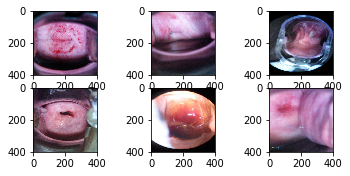

In [68]:
IMAGE_SIZE = 400
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
%matplotlib inline
datagen = ImageDataGenerator()           
for X_batch, y_batch in datagen.flow_from_directory('data/train',  target_size=(IMAGE_SIZE, IMAGE_SIZE), class_mode='categorical', batch_size=6):
    for i in range(0, 6):
        X_batch[i] = X_batch[i].astype('float32')
        X_batch[i] /= 255
        
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(IMAGE_SIZE, IMAGE_SIZE, 3))
    plt.show()
    break